In [1]:
from Bio import SeqIO
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
from scipy import stats    
import math
from sklearn.decomposition import PCA
from scipy.interpolate import Rbf
import scipy.cluster.hierarchy as shc
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [19]:
seq = ""
sequences = []
ids = []
for record in SeqIO.parse("./align-all.fasta", "fasta"):
    sequences.append(record.seq)
    ids.append(record.id)

In [3]:
sequences

[Seq('--------MFI--FLL-FLT--------LTSGSDLDRCTT--FDD---VQAPN-...---', SingleLetterAlphabet()),
 Seq('--------MFI--FLL-FLT--------LTSGSDLDRCTT--FDD---VQAPN-...---', SingleLetterAlphabet()),
 Seq('--------MFI--FLL-FLT--------LTSGSDLDRCTT--FDD---VQAPN-...---', SingleLetterAlphabet()),
 Seq('--------MKVLIF---ALL--------FSLAKAQEGCGI--ISR---KPQPK-...---', SingleLetterAlphabet()),
 Seq('--------MKVLIF---ALL--------FSLAKAQEGCGI--ISR---KPQPK-...---', SingleLetterAlphabet()),
 Seq('----------MILL---LLF--------LSSAKAQEGCGV--ISN---KPQRT-...---', SingleLetterAlphabet()),
 Seq('--------MKILIL---AFL--------ASLAKAQEGCGI--ISR---KPQPK-...---', SingleLetterAlphabet()),
 Seq('--------MKILIF---AFL--------ANLAKAQEGCGI--ISR---KPQPK-...---', SingleLetterAlphabet()),
 Seq('--------MKILIF---AFL--------VTLVKAQEGCGV--INL---RTQPK-...---', SingleLetterAlphabet()),
 Seq('--------MFIVFLISYTTF--------LIPYTATTTC----FSG---PTIEN-...---', SingleLetterAlphabet()),
 Seq('--------MFIVFLISYTTF--------LIPYTATTTC----FKG---PTTEN-

In [8]:
ls_alpha=[["A","D","K","E","R","N","T","S","Q"], ["Y","F","L","I","V","M","C","W","H"], ["G"], ["P"], ["-"]]
ls_binary=[[1,0,0,0,0], [0,1,0,0,0], [0,0,1,0,0], [0,0,0,1,0], [0,0,0,0,1]]
for i in range(len(ls_binary)):
    for a in ls_alpha[i]:
        dict_pro[a]=ls_binary[i]
        
dict_pro

{'A': [1, 0, 0, 0, 0],
 'D': [1, 0, 0, 0, 0],
 'K': [1, 0, 0, 0, 0],
 'E': [1, 0, 0, 0, 0],
 'R': [1, 0, 0, 0, 0],
 'N': [1, 0, 0, 0, 0],
 'T': [1, 0, 0, 0, 0],
 'S': [1, 0, 0, 0, 0],
 'Q': [1, 0, 0, 0, 0],
 'Y': [0, 1, 0, 0, 0],
 'F': [0, 1, 0, 0, 0],
 'L': [0, 1, 0, 0, 0],
 'I': [0, 1, 0, 0, 0],
 'V': [0, 1, 0, 0, 0],
 'M': [0, 1, 0, 0, 0],
 'C': [0, 1, 0, 0, 0],
 'W': [0, 1, 0, 0, 0],
 'H': [0, 1, 0, 0, 0],
 'G': [0, 0, 1, 0, 0],
 'P': [0, 0, 0, 1, 0],
 '-': [0, 0, 0, 0, 1]}

In [11]:
seq_vec = pd.DataFrame([list(np.concatenate([dict_pro[alpha] for alpha in seq])) for seq in sequences])
seq_vec.head()

,0,1,2,3,4,5,6,7,8,9,...,7455,7456,7457,7458,7459,7460,7461,7462,7463,7464
0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [15]:
summarized=seq_vec.sum(axis=0)
#summarized = seq_vec.sum(axis=0)/len(summarized)
summarized=pd.DataFrame(summarized.values.reshape((len(summarized)//len(dict_pro["A"]),len(dict_pro["A"]))))
pw=summarized/len(seq_vec)
pw.head()

,0,1,2,3,4
0,0.00,0.36,0.0,0.0,0.64
1,0.16,0.20,0.0,0.0,0.64
2,0.16,0.16,0.0,0.0,0.68
3,0.16,0.16,0.0,0.0,0.68
4,0.08,0.28,0.0,0.0,0.64


In [16]:
pca = PCA(n_components=3)
vecs_seqs=pca.fit_transform(seq_vec) 
vecs_pos = pca.fit_transform(pw)

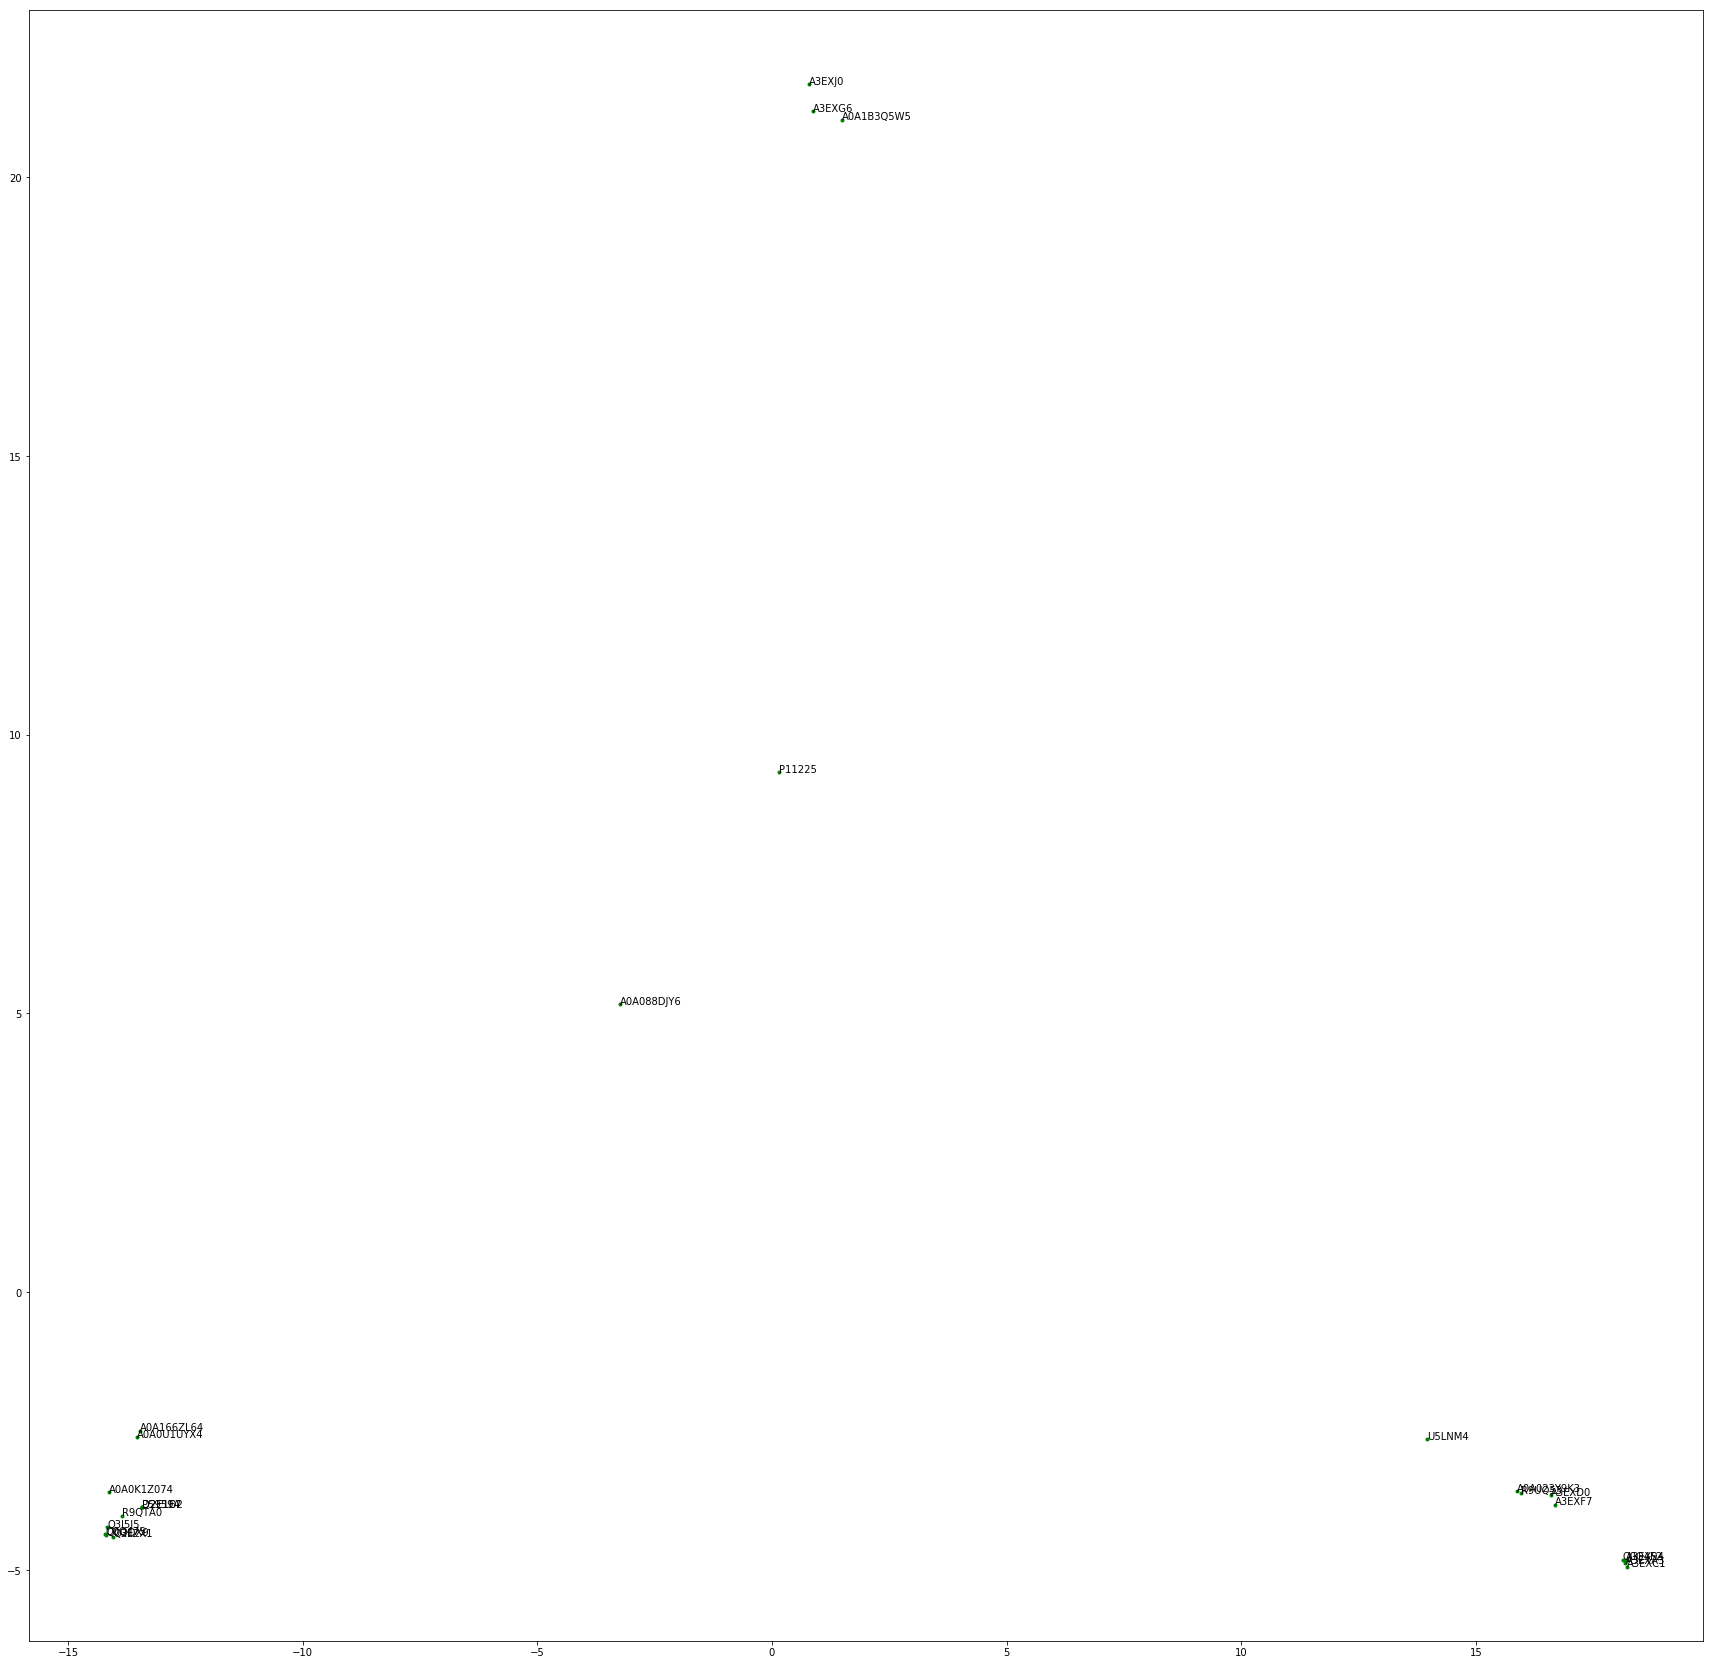

In [23]:
plt.figure(figsize = (30, 30))
ax = plt.subplot()
plt.plot(vecs_seqs[:,0], vecs_seqs[:,1], "g.")

for i in range(len(vecs_seqs[:,0])):
    ax.annotate(ids[i], (vecs_seqs[i,0], vecs_seqs[i,1]))

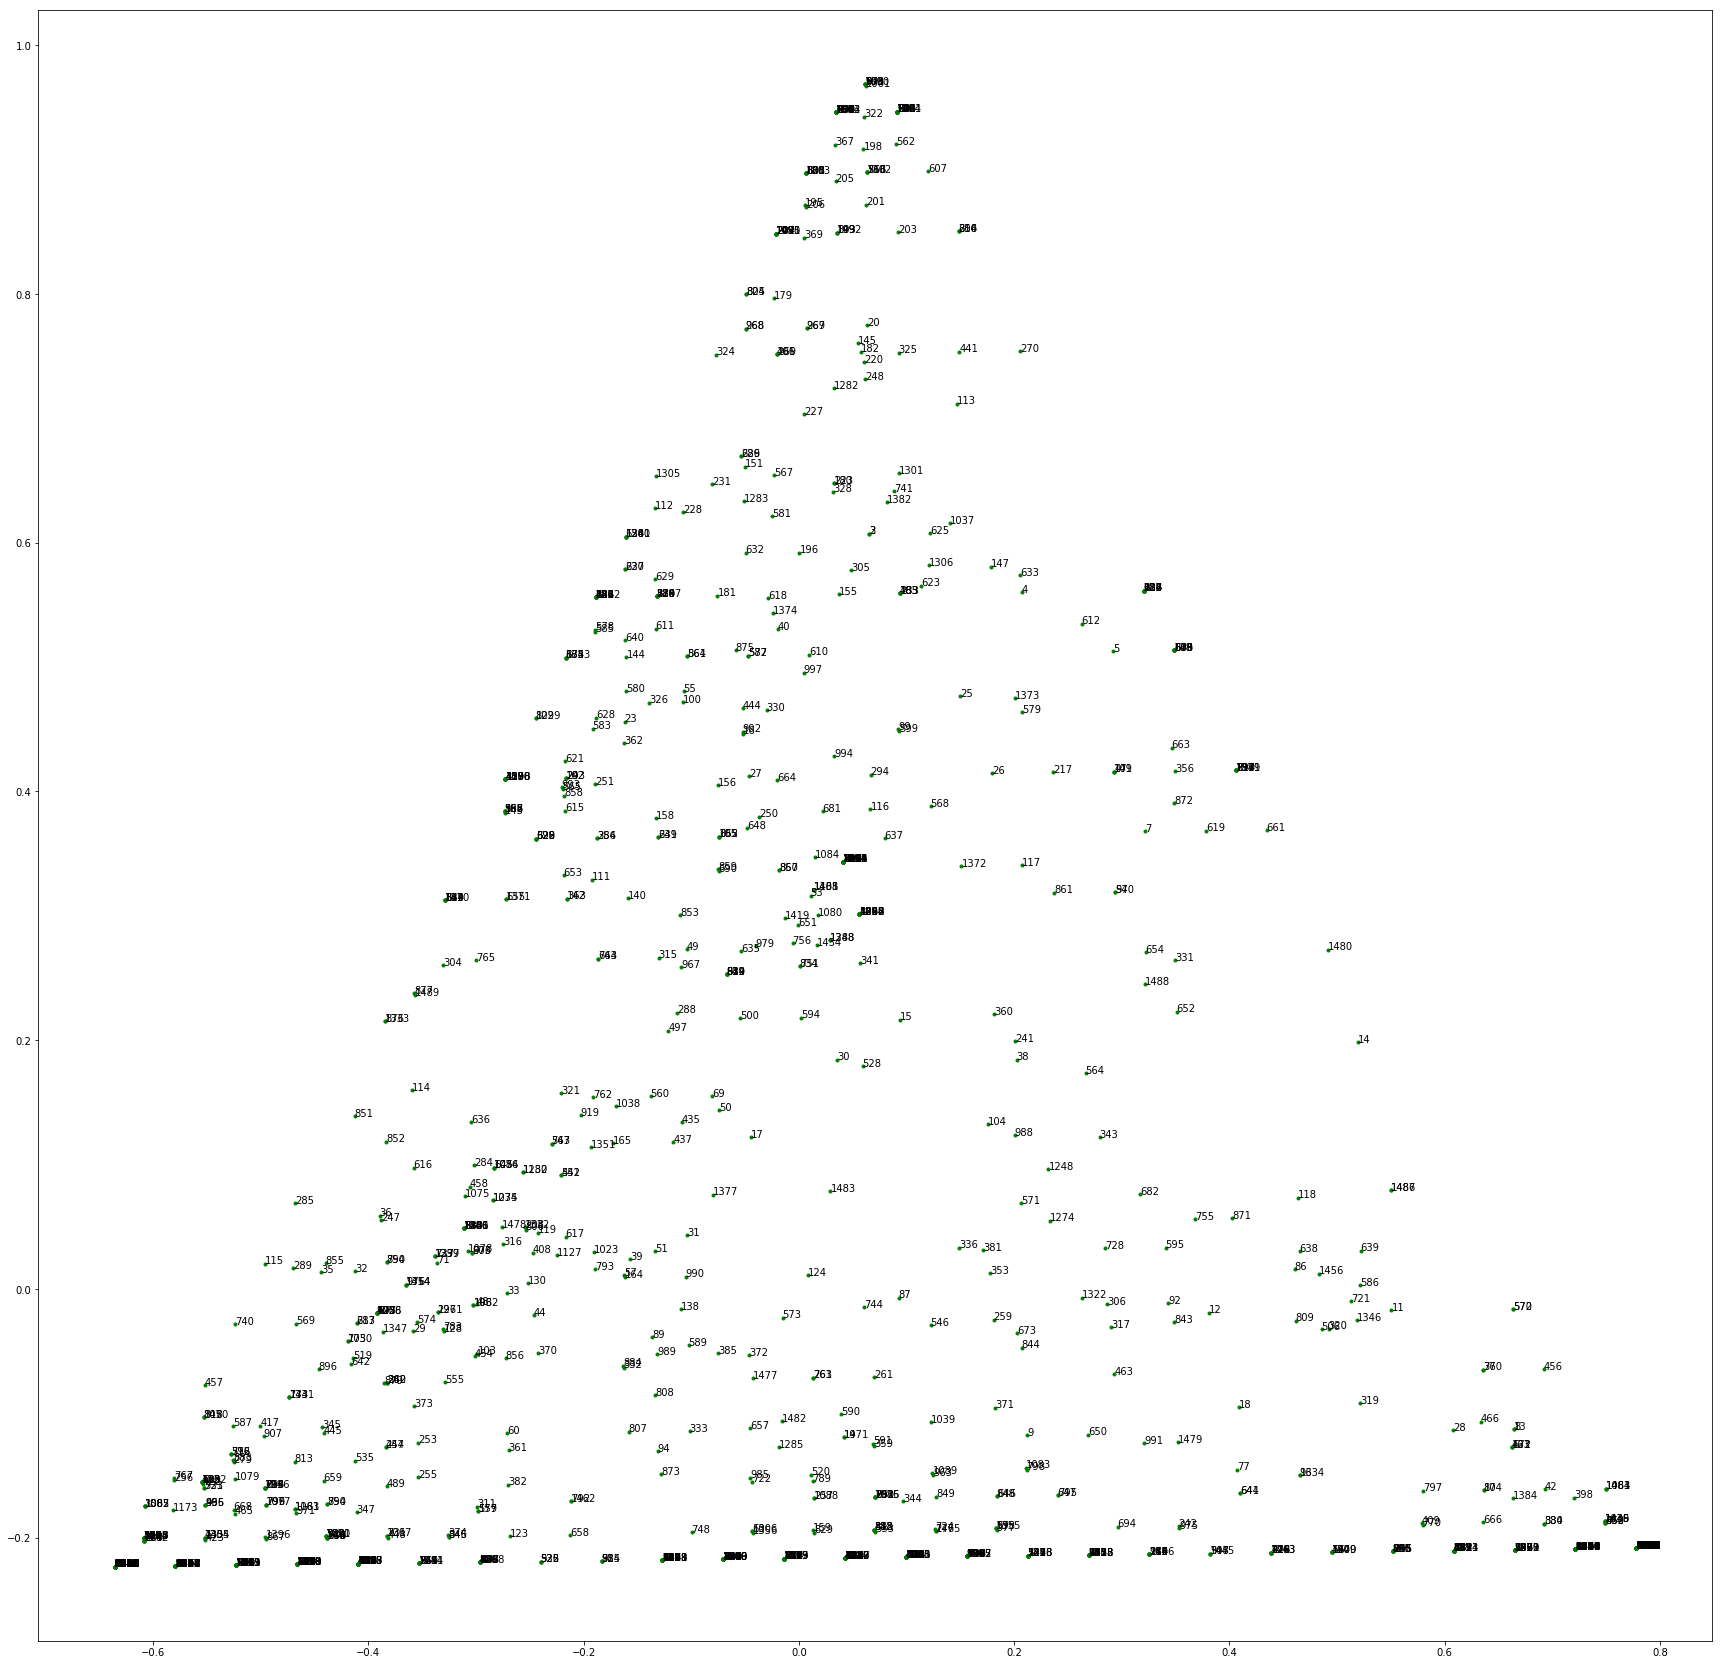

In [102]:
plt.figure(figsize = (30, 30))
ax = plt.subplot()
plt.plot(vecs_pos[:,0], vecs_pos[:,1], "g.")

for i in range(len(vecs_pos[:,0])):
    ax.annotate(str(i), (vecs_pos[i,0], vecs_pos[i,1]))

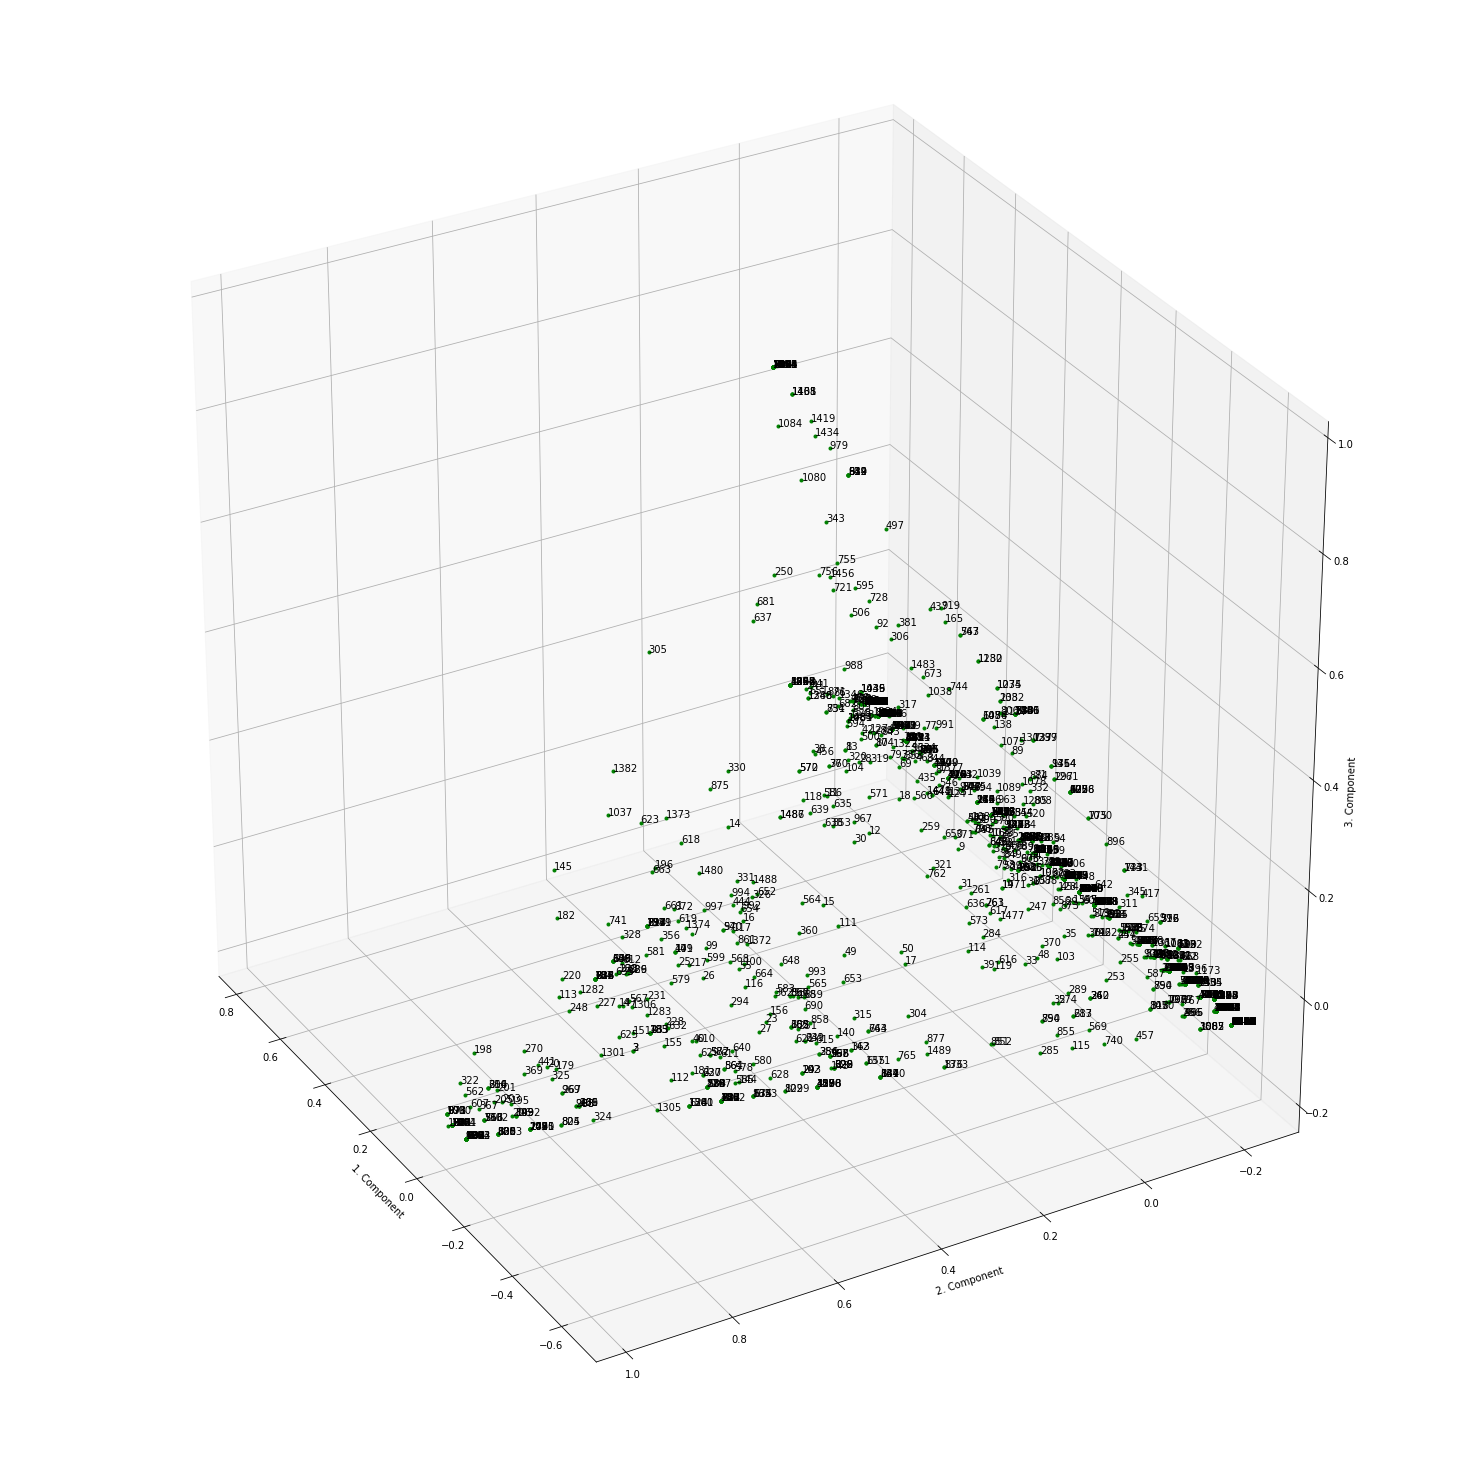

In [101]:
fig=plt.figure(figsize = (20, 20))
ax = Axes3D(fig)
ax.plot(vecs_pos[:,0], vecs_pos[:,1], vecs_pos[:,2], "g.")

for i in range(len(vecs_pos[:,0])):
    ax.text(vecs_pos[i,0], vecs_pos[i,1], vecs_pos[i,2],str(i))
    
ax.set_xlabel('1. Component')
ax.set_ylabel('2. Component')
ax.set_zlabel('3. Component')
ax.view_init(elev=30, azim=150)
plt.savefig("pyramid")
plt.show()

In [84]:
fst=pd.DataFrame(vecs_pos[:,0], index=pw.index)
mask_0p4=(np.absolute(fst).sort_values(0, ascending=False)[0] > 0.55)
for i in fst.loc[mask_0p4,:].index:
    print(i)
    

8
10
11
13
28
37
42
43
62
66
67
68
76
79
82
84
85
90
95
121
122
126
129
133
134
135
161
163
166
167
168
172
174
176
188
191
192
209
211
215
216
235
237
238
245
256
258
265
271
280
281
283
295
298
303
307
309
310
318
334
337
339
340
342
346
349
351
352
358
378
379
380
383
387
388
389
390
391
392
393
395
398
400
402
403
404
407
409
410
411
412
414
418
419
420
421
422
423
425
426
427
429
430
431
432
439
442
450
452
453
455
456
457
466
467
469
470
471
474
475
476
477
480
481
482
484
485
486
490
492
493
494
495
498
499
501
502
503
505
507
508
509
510
511
514
516
518
521
526
531
534
537
538
539
540
544
548
550
570
572
592
593
665
666
667
669
670
672
674
677
679
680
691
699
700
701
702
703
704
707
708
710
712
713
718
723
725
727
730
738
743
745
746
747
749
752
757
758
759
760
767
770
771
773
774
777
778
779
780
782
784
786
797
805
810
811
812
816
817
818
830
831
832
833
835
837
839
840
865
866
868
869
874
880
887
888
889
891
892
893
894
895
897
898
899
900
901
902
905
906
908
910
911
912
913
